# Baywheels Data Exploration

## Preliminary Wrangling

This document explores a dataset containing 158,168 bike ride rentals.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math
%matplotlib inline

In [2]:
#loading in the dataset
bike_data = pd.read_csv('202006-baywheels-tripdata.csv')

In [3]:
#printing out different statistics for the data frame
print(bike_data.shape)
print(bike_data.dtypes)
bike_data.head(15)

(158168, 13)
ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id      float64
end_station_name       object
end_station_id        float64
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,08A4A9F7315901F3,electric_bike,2020-06-03 16:37:10,2020-06-03 16:48:28,NaN,NaN,NaN,NaN,37.770000,-122.400000,37.760000,-122.420000,casual
1,844F9D906468C441,electric_bike,2020-06-03 12:22:47,2020-06-03 12:44:02,NaN,NaN,NaN,NaN,37.780000,-122.490000,37.780000,-122.460000,casual
2,0E441BF8A86C544E,electric_bike,2020-06-02 17:37:43,2020-06-02 17:52:21,Powell St at Columbus Ave,487.0,NaN,NaN,37.800426,-122.410950,37.790000,-122.440000,casual
3,CAFE64864422F475,electric_bike,2020-06-02 18:13:01,2020-06-02 18:48:30,NaN,NaN,NaN,NaN,37.760000,-122.410000,37.770000,-122.430000,casual
4,172957A20160D568,electric_bike,2020-06-03 15:16:06,2020-06-03 16:06:10,Church St at Duboce Ave,85.0,48th Ave at Cabrillo St,521.0,37.769841,-122.429210,37.772894,-122.509079,casual
5,69E225093739C325,electric_bike,2020-06-03 16:10:53,2020-06-03 16:24:42,NaN,NaN,NaN,NaN,37.780000,-122.440000,37.760000,-122.430000,casual
6,2694981712A0D672,electric_bike,2020-06-03 16:26:38,2020-06-03 16:30:34,NaN,NaN,NaN,NaN,37.770000,-122.390000,37.770000,-122.390000,casual
7,675ADCACD1F825A2,electric_bike,2020-06-03 07:54:46,2020-06-03 08:11:25,NaN,NaN,Yerba Buena Center for the Arts (Howard St at ...,284.0,37.760000,-122.420000,37.785049,-122.400953,casual
8,AC29BDD9051D1827,electric_bike,2020-06-03 12:13:30,2020-06-03 12:36:27,Cesar Chavez St at Dolores St,140.0,4th St at 16th St,104.0,37.747758,-122.425121,37.767008,-122.390851,casual
9,DA3A000674FF5516,electric_bike,2020-06-03 14:49:24,2020-06-03 15:06:48,NaN,NaN,NaN,NaN,37.810000,-122.410000,37.790000,-122.420000,casual


In [4]:
bike_data.describe()

,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng
count,99220.000000,97151.000000,158168.000000,158168.000000,157892.000000,157892.000000
mean,222.670762,220.933104,37.730514,-122.353640,37.730497,-122.353779
std,170.109389,169.794631,0.140991,0.170709,0.141111,0.170778
min,3.000000,3.000000,37.240000,-122.510000,37.230000,-122.540000
25%,73.000000,73.000000,37.760000,-122.431873,37.760000,-122.431184
50%,156.000000,149.000000,37.773717,-122.412036,37.773532,-122.412073
75%,381.000000,380.000000,37.788396,-122.391173,37.788927,-122.391198
max,532.000000,532.000000,37.880222,-121.770000,37.950000,-121.760000


In [5]:
#adding a new column for total ride time in minutes
bike_data['started_at'] = pd.to_datetime(bike_data['started_at'], format='%Y-%m-%d %H:%M:%S')
bike_data['ended_at'] = pd.to_datetime(bike_data['ended_at'], format='%Y-%m-%d %H:%M:%S')
bike_data['ride_time'] = (bike_data['ended_at'] - bike_data['started_at']).astype('timedelta64[m]')

bike_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_time
0,08A4A9F7315901F3,electric_bike,2020-06-03 16:37:10,2020-06-03 16:48:28,NaN,NaN,NaN,NaN,37.770000,-122.40000,37.760000,-122.420000,casual,11.0
1,844F9D906468C441,electric_bike,2020-06-03 12:22:47,2020-06-03 12:44:02,NaN,NaN,NaN,NaN,37.780000,-122.49000,37.780000,-122.460000,casual,21.0
2,0E441BF8A86C544E,electric_bike,2020-06-02 17:37:43,2020-06-02 17:52:21,Powell St at Columbus Ave,487.0,NaN,NaN,37.800426,-122.41095,37.790000,-122.440000,casual,14.0
3,CAFE64864422F475,electric_bike,2020-06-02 18:13:01,2020-06-02 18:48:30,NaN,NaN,NaN,NaN,37.760000,-122.41000,37.770000,-122.430000,casual,35.0
4,172957A20160D568,electric_bike,2020-06-03 15:16:06,2020-06-03 16:06:10,Church St at Duboce Ave,85.0,48th Ave at Cabrillo St,521.0,37.769841,-122.42921,37.772894,-122.509079,casual,50.0


In [6]:
#calculating distance in miles based off of Lad. and Long.
def find_distance(lat1, lon1, lat2, lon2):
    R = 6373.0

    lat1_r = math.radians(lat1)

    lon1_r = math.radians(lon1)
    lat2_r = math.radians(lat2)
    lon2_r = math.radians(lon2)

    dlon = lon2_r - lon1_r

    dlat = lat2_r - lat1_r

    a = math.sin(dlat / 2)**2 + math.cos(lat1_r) * math.cos(lat2_r) * math.sin(dlon / 2)**2

    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c * 0.621371 #the .621371 is to convert from kilometers to miles
    return distance



In [7]:
bike_data['distance'] = bike_data.apply(lambda x: find_distance(x['start_lat'], x['start_lng'], x['end_lat'], x['end_lng']), axis=1)

In [8]:
bike_data.describe()

,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,ride_time,distance
count,99220.000000,97151.000000,158168.000000,158168.000000,157892.000000,157892.000000,158168.000000,157892.000000
mean,222.670762,220.933104,37.730514,-122.353640,37.730497,-122.353779,26.461263,1.269390
std,170.109389,169.794631,0.140991,0.170709,0.141111,0.170778,308.301132,1.033980
min,3.000000,3.000000,37.240000,-122.510000,37.230000,-122.540000,-15.000000,0.000000
25%,73.000000,73.000000,37.760000,-122.431873,37.760000,-122.431184,7.000000,0.546337
50%,156.000000,149.000000,37.773717,-122.412036,37.773532,-122.412073,13.000000,1.075581
75%,381.000000,380.000000,37.788396,-122.391173,37.788927,-122.391198,23.000000,1.794869
max,532.000000,532.000000,37.880222,-121.770000,37.950000,-121.760000,37233.000000,11.456659


In [9]:
bike_data[bike_data['ride_time'] <0]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_time,distance
75902,212C62343A1BE3D3,docked_bike,2020-06-18 14:41:30,2020-06-18 14:41:20,McAllister St at Arguello Blvd,455.0,18th Ave at California St,515.0,37.775213,-122.458333,37.785111,-122.477667,casual,-1.0,1.258345
82491,73B8B54458A48010,docked_bike,2020-06-19 21:48:20,2020-06-19 21:34:17,El Embarcadero at Grand Ave,197.0,14th St at Mandela Pkwy,230.0,37.808847,-122.249679,37.810743,-122.291415,casual,-15.0,2.282747
82888,D68D570C2C418A91,docked_bike,2020-06-24 08:51:16,2020-06-24 08:50:57,Hearst Ave at Euclid Ave,256.0,Telegraph Ave at Ashby Ave,248.0,37.875111,-122.260553,37.855956,-122.259795,member,-1.0,1.324558
83218,C99611538EA3CF5F,docked_bike,2020-06-17 16:20:11,2020-06-17 16:20:04,Jones St at Post St,370.0,Hyde St at Post St,369.0,37.787326,-122.413278,37.787349,-122.416651,casual,-1.0,0.184249
88910,8B24F6D5836CE5A5,docked_bike,2020-06-28 14:31:53,2020-06-28 14:31:36,Brannan St at 4th St,453.0,Market St at 10th St,58.0,37.777933,-122.396973,37.776619,-122.417385,casual,-1.0,1.118766
89756,17A3D9D6EFFA340D,docked_bike,2020-06-28 14:42:58,2020-06-28 14:42:50,Grand Ave at Perkins St,196.0,Grand Ave at Perkins St,196.0,37.808893,-122.256460,37.808894,-122.256460,casual,-1.0,0.000065
91590,AEDBB2FBF4C7D8CA,docked_bike,2020-06-01 14:06:18,2020-06-01 14:06:00,17th St at Dolores St,107.0,Market St at 10th St,58.0,37.763015,-122.426496,37.776619,-122.417385,member,-1.0,1.063873
91595,A4F775243A1AC681,docked_bike,2020-06-02 18:53:53,2020-06-02 18:53:38,Berry St at 4th St,81.0,San Francisco Caltrain (Townsend St at 4th St),30.0,37.775880,-122.393170,37.776598,-122.395282,member,-1.0,0.125596
96024,1B2341DB5090CBF1,docked_bike,2020-06-17 16:24:59,2020-06-17 16:24:42,Hearst Ave at Euclid Ave,256.0,North Berkeley BART Station,250.0,37.875111,-122.260553,37.873558,-122.283093,casual,-1.0,1.234380
103017,0B3276E81FAC478D,docked_bike,2020-06-19 21:37:27,2020-06-19 21:33:50,El Embarcadero at Grand Ave,197.0,14th St at Mandela Pkwy,230.0,37.808847,-122.249679,37.810743,-122.291415,casual,-4.0,2.282747


In [10]:
bike_data[bike_data['ride_time'] >120]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_time,distance
360,53120FCF4D80BEF3,electric_bike,2020-06-27 16:46:14,2020-06-27 19:03:38,14th Ave at Geary Blvd,474.0,14th Ave at Geary Blvd,474.0,37.780310,-122.472765,37.780322,-122.472833,casual,137.0,0.003799
524,08CA37AB49247279,electric_bike,2020-06-16 21:19:38,2020-06-17 00:26:43,NaN,NaN,NaN,NaN,37.780000,-122.420000,37.770000,-122.440000,casual,187.0,1.292851
549,65C06319885B07AE,electric_bike,2020-06-15 07:43:58,2020-06-15 09:49:05,14th Ave at Geary Blvd,474.0,14th Ave at Geary Blvd,474.0,37.780290,-122.472792,37.780289,-122.472815,casual,125.0,0.001267
688,33ADA7D24FE582FF,electric_bike,2020-06-06 14:11:50,2020-06-06 16:46:10,NaN,NaN,34th Ave at Balboa St,524.0,37.770000,-122.500000,37.775722,-122.494110,casual,154.0,0.509840
835,7DC022B5D3AEE223,electric_bike,2020-06-06 12:11:46,2020-06-06 14:27:41,Webster St at Grove St,55.0,Jersey St at Castro St,137.0,37.777208,-122.429609,37.750526,-122.433792,casual,135.0,1.858212
972,E1A09CB0AF42EDA9,electric_bike,2020-06-26 12:33:19,2020-06-26 14:38:11,Yerba Buena Center for the Arts (Howard St at ...,284.0,Lombard St at Columbus Ave,371.0,37.784791,-122.401000,37.802787,-122.413362,casual,124.0,1.415221
1008,A3AD8A5CDCF4D745,electric_bike,2020-06-18 17:49:38,2020-06-18 19:50:58,NaN,NaN,NaN,NaN,37.810000,-122.410000,37.800000,-122.410000,casual,121.0,0.691150
1092,B1384CD56218A845,electric_bike,2020-06-21 07:34:11,2020-06-21 15:34:31,23rd Ave at Clement St,520.0,NaN,NaN,37.782003,-122.482768,37.780000,-122.470000,casual,480.0,0.711062
1159,958A7C74B6F0D175,electric_bike,2020-06-30 16:19:24,2020-06-30 18:39:20,Grove St at Gough St,468.0,Grove St at Gough St,468.0,37.777859,-122.422709,37.777917,-122.422862,casual,139.0,0.009271
1618,33C43BBCB5E8BB48,electric_bike,2020-06-27 18:50:05,2020-06-27 21:01:56,NaN,NaN,NaN,NaN,37.780000,-122.410000,37.780000,-122.400000,casual,131.0,0.546263


In [11]:
bike_data = bike_data[bike_data['ride_time'] <120]

In [12]:
print(len(bike_data['start_station_name'].unique()))
print(len(bike_data['end_station_name'].unique()))

427
431


In [13]:
bike_data['rideable_type'].unique()

array(['electric_bike', 'docked_bike'], dtype=object)

### What is the structure of your dataset?


There are 158,168 rides in this dataset.  Most variables are numeric, however they are mostly categorical. There are over 430 different stations where bikes can be picked up and docked. There are two different types of bikes, electric bikes and docked bikes. There are also two types of users: member and casual.

### What is/are the main feature(s) of interest in your dataset?

I am interested in seeing the relationship between the bike types, ride time, and ride length.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?


I am expecting that the electric bikes will have longer duration rides as well as farther trips.

## Univariate Exploration


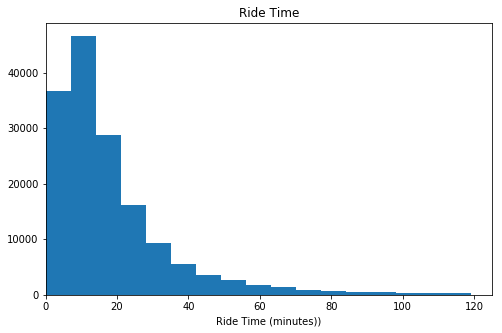

In [14]:
# start with a standard-scaled plot

binsize = 7
bins = np.arange(0, bike_data['ride_time'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike_data, x = 'ride_time', bins = bins)
plt.xlabel('Ride Time (minutes))')
plt.xlim([0,125]) #there was a lot of outliers and the graph looked best with this range
plt.title("Ride Time");
plt.show()

In [15]:
np.log10(bike_data['ride_time'].describe())

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


count    5.194201
mean     1.248904
std      1.238620
min           NaN
25%      0.845098
50%      1.113943
75%      1.342423
max      2.075547
Name: ride_time, dtype: float64

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2923: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


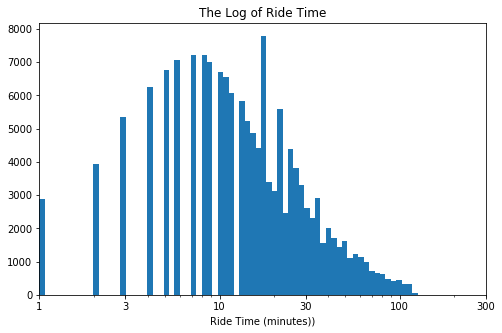

In [16]:
# there's a long tail in the distribution, so let's put it on a log scale instead

log_binsize = 0.03
bins = 10 ** np.arange(0, np.log10(bike_data['ride_time'].max())+log_binsize, log_binsize)
values = [10, 30, 100, 300, 1000]
plt.figure(figsize=[8, 5])
plt.hist(data = bike_data, x = 'ride_time', bins = bins)
plt.xscale('log')
plt.xlabel('Ride Time (minutes))')
plt.title("The Log of Ride Time");
plt.xlim([0,125]);
plt.xticks([1, 3, 10, 30, 100, 300], [1, 3, 10, 30, 100, 300])
plt.show()

Ride time has a long-tailed distribution, with most ride times being on lower end and few ride times on the higher end. When plotted on a log-scale, the ride time distribution looks unimodal that is slightly skewed right. There is a peak around 8-10 minute mark with outliers near the 18-20 minute mark and again at around 26-28 minute mark.

Text(0.5,0,'Distance (miles))')

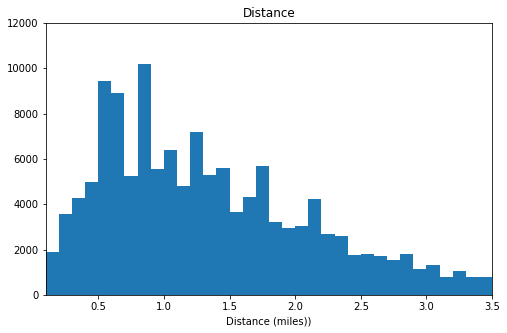

In [17]:
new_df = bike_data.dropna(subset=['distance'])
plt.figure(figsize=[8, 5])

binsize = .1
bins = np.arange(0, new_df['distance'].max()+binsize, binsize)
plt.hist(data = new_df, x = 'distance', bins = bins)
plt.xlim([.1,3.5])
plt.ylim([0,12000])
plt.title("Distance");
plt.xlabel('Distance (miles))')


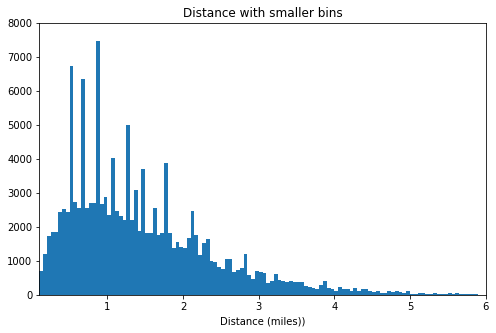

In [18]:
new_df = bike_data.dropna(subset=['distance'])
#print(new_df.shape)

binsize = .05
bins = np.arange(0, new_df['distance'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = new_df, x = 'distance', bins = bins)
plt.xlim([.1,6])
plt.ylim([0,8000])
plt.xlabel('Distance (miles))')
plt.title("Distance with smaller bins");

After calculating the distance from the start and end longitude and latitudes, its clear that there are spikes near the .5 mile mark and the .8 mile mark.

After zooming in and making the bin sizes smaller, there are a lot more spikes, the .5 mile mark, the ~.65 mile mark, and the .85 mile mark.

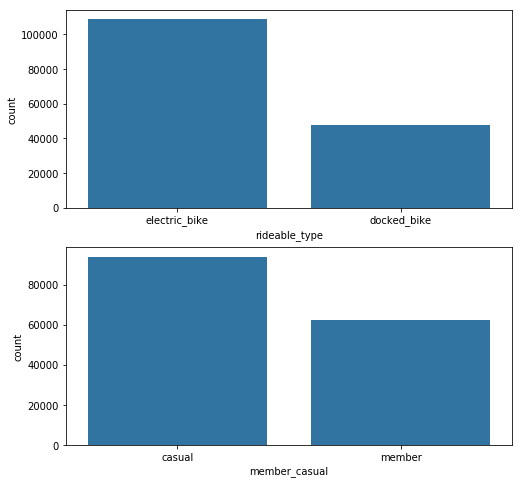

In [19]:
fig, ax = plt.subplots(nrows=2, figsize = [8,8])
default_color = sb.color_palette()[0]
sb.countplot(data = bike_data, x = 'rideable_type', color = default_color,  ax = ax[0])
sb.countplot(data = bike_data, x = 'member_casual', color = default_color,  ax = ax[1])
plt.show()

It is a little surprising to see that nearly double the amount of electric bikes(~120,000) were used over the docked bikes(~60,000). There were more casual people using the riding service than members as well, nearing almost 100,000 casual and around 60,000 members.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?


The ride time had a large range of values, which I used a log transformation to further investigate. The peak of the graph was around the 8 minute mark and then with an unusual large spike around the 20 minute mark. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?¶


When investigating distance, some of the datapoints for the start/end longitude/latitudes were missing. I decided to not include those datapoints as the distance could not be computed for those rows. I also dropped the ride times that were over 120 minutes which was around 1755, which helped remove major outliers as some of the times were unrealistic for a rentable bike.

## Bivariate Exploration


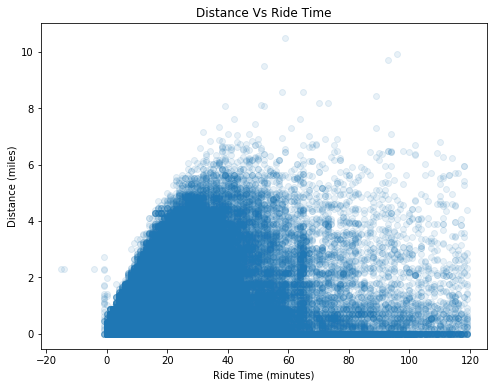

In [20]:
new_df = bike_data.dropna(subset=['distance'])

plt.figure(figsize = [8, 6])
plt.scatter(data = new_df, x = 'ride_time', y = 'distance', alpha=1/10)
#plt.xlim([0, 120])
plt.xlabel('Ride Time (minutes)')
plt.ylabel('Distance (miles)')
plt.title("Distance Vs Ride Time");
plt.show()

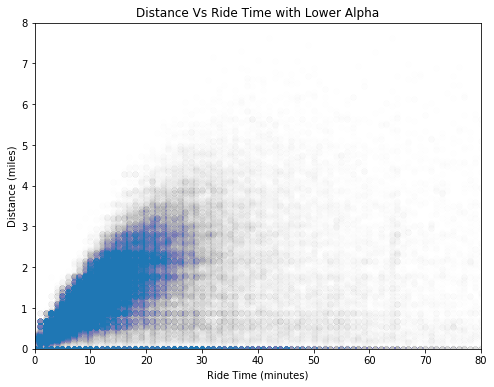

In [21]:
new_df = bike_data.dropna(subset=['distance'])

plt.figure(figsize = [8, 6])
plt.scatter(data = new_df, x = 'ride_time', y = 'distance', alpha=1/500)
plt.xlim([0, 80])
plt.ylim([0, 8])
plt.xlabel('Ride Time (minutes)')
plt.ylabel('Distance (miles)')
plt.title("Distance Vs Ride Time with Lower Alpha");
plt.show()

To get a clear picture, I had to change the alpha to 1/500 to see the trend of Ride Time increase linearly with Distance. Originally, it looked like a normal distribution where after 40 minutes and 5 miles, the ride time would increase but the distance would decrease.

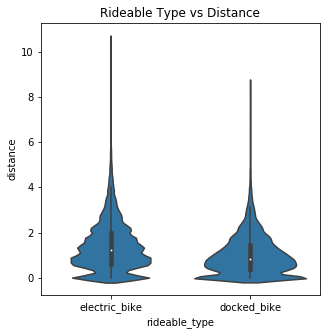

In [22]:
plt.figure(figsize = [5, 5])

base_color = sb.color_palette()[0]
sb.violinplot(data = bike_data, x = 'rideable_type', y = 'distance', color = base_color);
plt.title("Rideable Type vs Distance");

For Rideable Type vs Distance, the electric bike had minimum near 0 and a max at around 11. Majority of the distributions for both rideable types are in between slightly over 0 miles and 4 miles. The Dock Bike vs Distance has the same minimum as the electric bike and a slightly lower maximum at 8 or so. There is a larger concentration near the 0 miles distance and generally wider towards the bottom meaning more people on dock bikes took shorter rides (distance wise).

Text(0.5,1,'Ridable Type vs Ride Time')

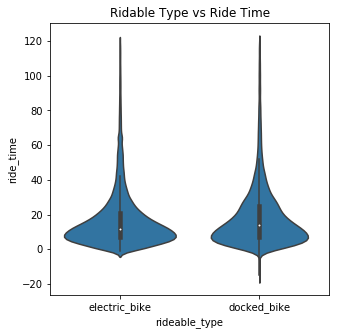

In [23]:
plt.figure(figsize = [5, 5])

base_color = sb.color_palette()[0]
sb.violinplot(data = bike_data, x = 'rideable_type', y = 'ride_time', color = base_color);
plt.title("Ridable Type vs Ride Time")

For Rideable Type vs Time, the electric bike had minimum near 0 and a max at 120 minutes (since that is what I made the cut off). Majority of the distribution is in between 10 and 20 minutes tapering off at 60 minutes. The Dock Bike vs Distance has a lower minimum since some of the end times were before the start times, making the Ride Time negative. The Dock Bike has the same peak of 120 minutes. The Dock bike has less of a concentration than the electric bike as the distribution looks to be near the 10 minute mark and goes up to around 30-40 minutes which then tapers off to around 60.

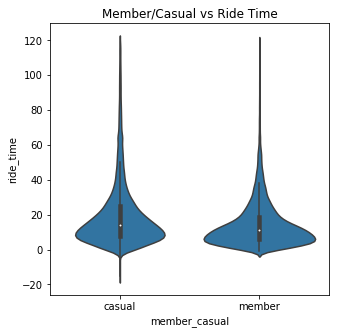

In [24]:
plt.figure(figsize = [5, 5])

base_color = sb.color_palette()[0]
sb.violinplot(data = bike_data, x = 'member_casual', y = 'ride_time', color = base_color);
plt.title("Member/Casual vs Ride Time");

For Member Casual vs Time, the casual has a minimum ride time under 0 (as previously stated) and a max at 120. Majority of the distribution is in between 10 and 20 minutes tapering off at 60 minutes. The Member Riders have the same peak of 120 minutes. The Member Riders have more of a concentration than the Casual Riders as the distribution looks to be near the 10 minute mark and goes up to around 30-40 minutes which then tapers off to around 60.

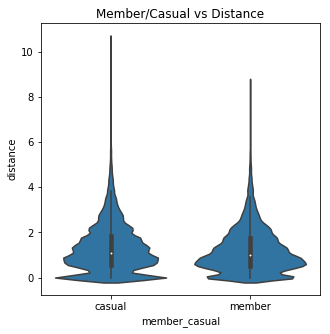

In [25]:
plt.figure(figsize = [5, 5])

base_color = sb.color_palette()[0]
sb.violinplot(data = bike_data, x = 'member_casual', y = 'distance', color = base_color);
plt.title("Member/Casual vs Distance");

For Member Casual vs Distance, the casual user has minimum near 0 and a max at around 11. Majority of both distributions are in between slightly over 0 miles and 2 miles and tapers off at around 4 miles. The Dock Bike vs Distance has the same minimum and a slightly lower maximum at 9 or so. Majority of both the casual and member riders have large clusters slightly above the 0 mile mark. The members tend to favor around a mile or so and taper off at around mile 4.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

For the relation of Ride Time vs Distance, there is a clear positive trend of ride time to distance. As stated previously, there were some riders who would take over an hour minutes but had less distance than expected.

For the relationship of Rideable Type and Ride time, the Dock bike has less of a concentration than the electric bike as the distribution looks to be near the 10 minute mark and goes up to around 30-40 minutes which then tapers off to around 60, while the electric bike has a large concentration near the 10 minute mark.

The relationship between Rideable Type and Distance is that the majority of the distributions for both rideable types are in between slightly over 0 miles and 4 miles, where the docked bike has a larger concentration near the 1 mile mark.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I observed a similar observation as the previous one stated; I looked at the relationship between Member/Casual vs Distance and Ride Time.

For Member/Casual vs Distance, majority of both the casual and member riders have large clusters slightly above the 0 mile mark. The members tend to favor around a mile or so and taper off at around mile 4.

For Member/Casual vs Ride Time, the Member Riders have more of a concentration than the Casual Riders as the distribution looks to be near the 10 minute mark


## Multivariate Exploration

The main thing I want to explore in this part of the analysis is how distance and time compare between rideable types. As well as the comparison of distance and time to member/casual riders.

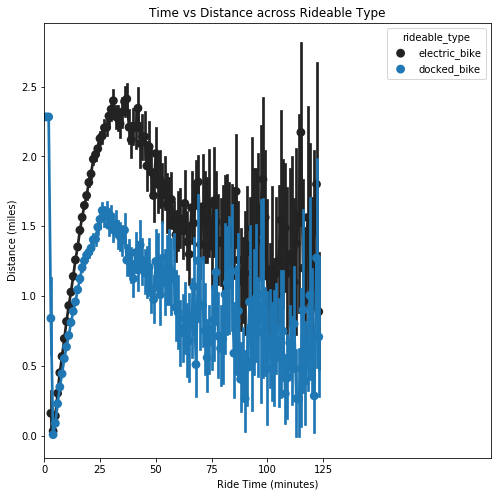

In [26]:
new_df = bike_data.dropna(subset=['distance'])

plt.figure(figsize = [8, 8])
default_color
sb.pointplot(data = new_df, x = 'ride_time', y = 'distance', hue = 'rideable_type', color = default_color)
plt.xlim([0, 200])
plt.xticks([0, 25, 50,75,100,125], [0,25, 50,75,100,125])
plt.xlabel('Ride Time (minutes)')
plt.ylabel('Distance (miles)')
plt.title("Time vs Distance across Rideable Type");
plt.show()

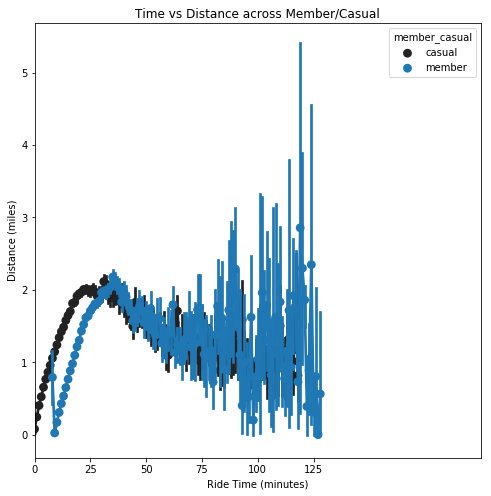

In [27]:
new_df = bike_data.dropna(subset=['distance'])
default_color = sb.color_palette()[0]
plt.figure(figsize = [8, 8])
sb.pointplot(data = new_df, x = 'ride_time', y = 'distance', hue = 'member_casual', color = default_color, dodge = 10)
plt.xlim([0, 200])
plt.xticks([0, 25, 50,75,100,125], [0,25, 50,75,100,125])
plt.xlabel('Ride Time (minutes)')
plt.ylabel('Distance (miles)')
plt.title("Time vs Distance across Member/Casual");
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Based on the first graph, there was longer and farther rides on the electric bike vs the docked bike. To a point, there is an positive trend between ride time and distance however that seems to peak at around 35 minutes and 2.5 miles for the electric bike and 25 minutes and 1.5 miles for the docked bike. 

I also viewed the Members and Casual riders vs Distance and Time. There was a similar trend of peaking at around the 25 to 30 minute mark and 2 mile mark for both casual and members riders. However after the 75 minute mark, it seems to be a lot more varied.

### Were there any interesting or surprising interactions between features?

Based on the previous section of bivariate, I thought that there would be less distance/time traveled for the electric bikers compared to the dock bikers, however that was not the case. It was a little surprising to see that the comparison of distance/time to rideable type looks very similar. 
